This tutotial follow the YouTube videos below

In [1]:
# Quick utility to embed the videos below
from IPython.display import YouTubeVideo
def embed_video(index, playlist='PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ'):
    return YouTubeVideo('', index=index - 1, list=playlist, width=600, height=350)

## Part 1: Loading and Visualizing Data

In [2]:
embed_video(1)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
import os
import pandas as pd
from urllib.request import urlretrieve

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremond_data(filename = 'Fremond.csv', url = URL, force_download = False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, 'Fremond.csv')
    data = pd.read_csv('Fremond.csv', index_col = 'Date', parse_dates = True)
    return data

In [5]:
data = get_fremond_data()
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


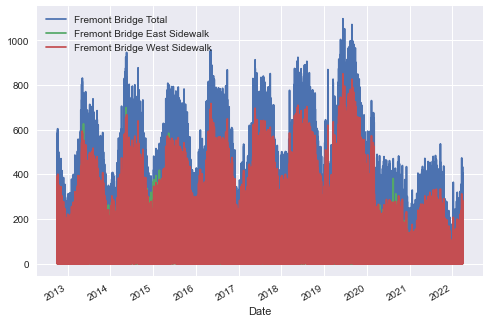

In [6]:
data.plot();

<AxesSubplot:xlabel='Date'>

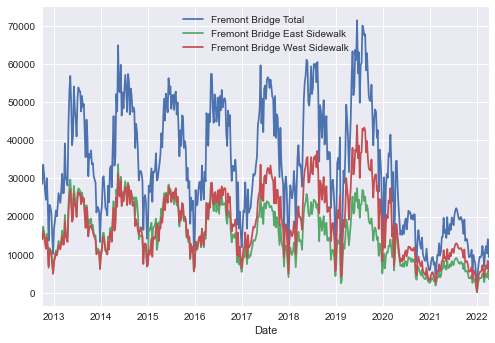

In [7]:
data.resample('W').sum().plot()

## Part 2: Further Data Exploration

<AxesSubplot:xlabel='Date'>

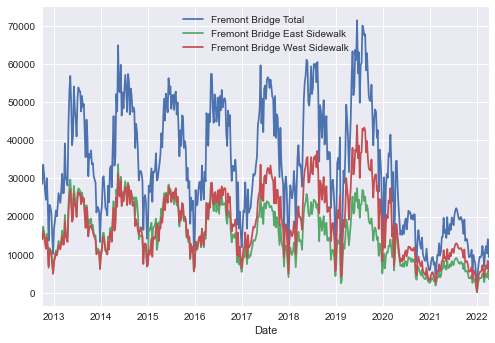

In [8]:

data.resample('W').sum().plot()

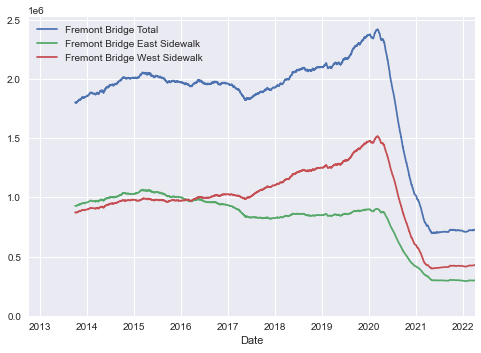

In [9]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None);

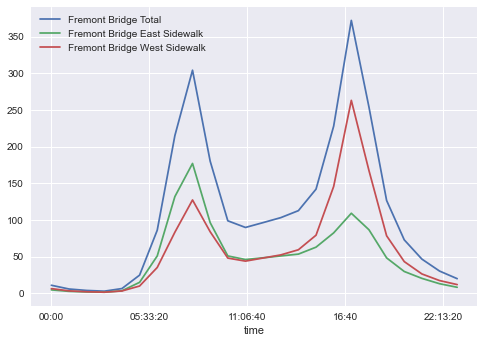

In [10]:
data.groupby(data.index.time).mean().plot();

In [11]:
data.groupby(data.index.time).mean().head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
00:00:00,10.850650,4.554521,6.296130
01:00:00,5.737916,2.548097,3.189819
02:00:00,3.772054,1.794430,1.977624
03:00:00,2.784166,1.409507,1.374659
04:00:00,6.349285,3.294363,3.055413


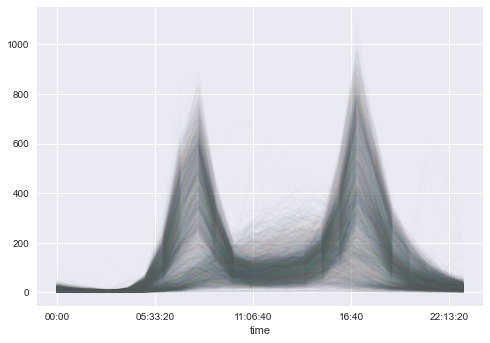

In [12]:
pivoted = data.pivot_table('Fremont Bridge Total', index = data.index.time, columns = data.index.date)
pivoted.plot(legend = False, alpha = 0.01);

In [13]:
df = pd.DataFrame(data = {'Age': [23, 26, 30, 34, 40, 56, 59],
                         'y': [0, 0, 0, 0, 1, 1, 0]})

bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = [0,1,2,3,4,5, 6]
df['Age_bin'] =  pd.cut(df['Age'], bins=bins, labels=labels)

In [14]:
df

,Age,y,Age_bin
0,23,0,2
1,26,0,2
2,30,0,2
3,34,0,3
4,40,1,3
5,56,1,5
6,59,0,5


In [15]:
from sklearn.model_selection import train_test_split
df['age_y'] = df['Age_bin'].astype(str) + df['y'].astype(str)
train, test = train_test_split(df, test_size=0.2, random_state=0, stratify=df[['age_y']])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
df

In [ ]:
df2 = pd.read_csv('../code/test.csv', delimiter=",")

In [ ]:
df2.notna()